In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import os

In [5]:
data = pd.read_csv("../Statistical Learning/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

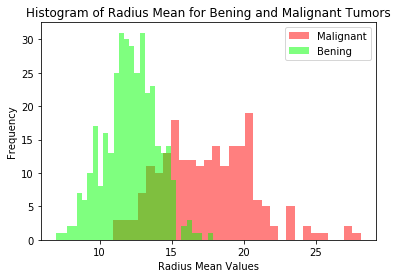

Most frequent Malignant is:  20.101999999999997


In [7]:
#Histogram: find down how many times each value appears in dataset
malignant__ = plt.hist(data[data["diagnosis"] == "M"].radius_mean, bins= 30, fc =(1, 0, 0, 0.5), label= "Malignant")
bening__ = plt.hist(data[data["diagnosis"] == "B"].radius_mean, bins=30, fc =(0, 1, 0, 0.5), label="Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

# calculate frequency of malignant
frequency_malignant = malignant__[0].max()
index_frequency_malignant = list(malignant__[0]).index(frequency_malignant)
most_frequency_malignant = malignant__[1][index_frequency_malignant]
print("Most frequent Malignant is: ", most_frequency_malignant)

In [8]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
print(desc)
Q1 = desc[4] #11.0000
Q3 = desc[6] #13.3700
IQR = Q3- Q1 #inter quartile Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Anything outside the range is outlier : (", lower_bound, ",", upper_bound, ")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ", data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64
Anything outside the range is outlier : ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


In [9]:
print("Mean: ", data_bening.radius_mean.mean())
print("Variance: ", data_bening.radius_mean.var())
print("standart deviation (std): ", data_bening.radius_mean.std())

Mean:  12.14652380952381
Variance:  3.170221722043872
standart deviation (std):  1.7805116461410389


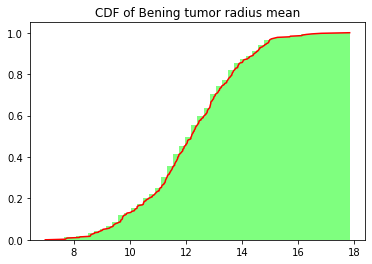

In [10]:
#CDF calculate
plt.hist(data_bening.radius_mean, bins= 50, fc = (0, 1, 0, 0.5), label= 'Bening', normed= True, cumulative= True)
#sort data
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data, y, color = 'red')
plt.title("CDF of Bening tumor radius mean")
plt.show()

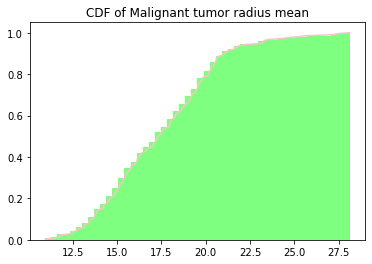

In [11]:
plt.hist(data_malignant.radius_mean, bins= 50, fc = (0, 1, 0, 0.5), normed= True, cumulative= True)
sorted_data = np.sort(data_malignant.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data, y, color = "pink")
plt.title("CDF of Malignant tumor radius mean")
plt.show()

In [12]:
# Calculate effect size
mean_different = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malig = data_malignant.radius_mean.var()
var_pooled = (len(data_bening) * var_bening + len(data_malignant) * var_malig)/float(len(data_bening) + len(data_malignant))
effect_size = mean_different/np.sqrt(var_pooled)
print("value of effect size: ", effect_size)

value of effect size:  2.2048585165041428


<Figure size 432x288 with 0 Axes>

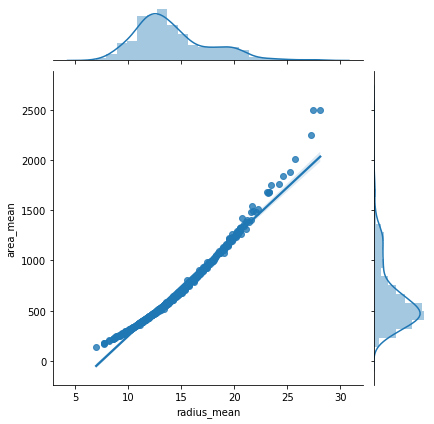

In [13]:
# Relationship between Variables: check how 2 variables have a Relation
plt.figure()
sns.jointplot(data.radius_mean, data.area_mean, kind= "regg") #co the them kind ="..."
plt.show()

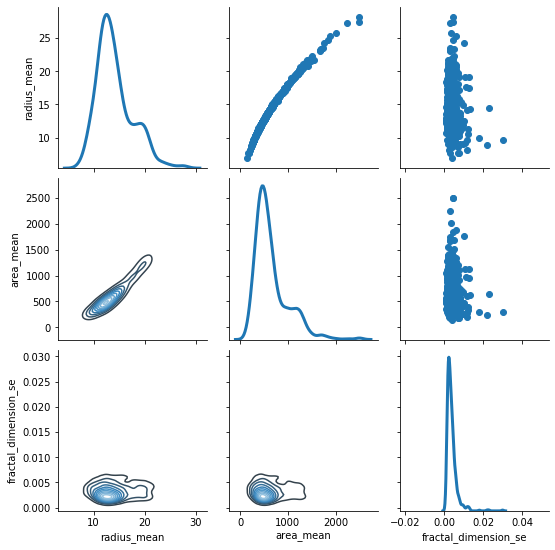

In [14]:
#when has more than 2 Distribution
df = data.loc[:, ["radius_mean", "area_mean", "fractal_dimension_se"]]
g = sns.PairGrid(df, diag_sharey = False)
g.map_lower(sns.kdeplot, cmap = "Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 3)
plt.show()

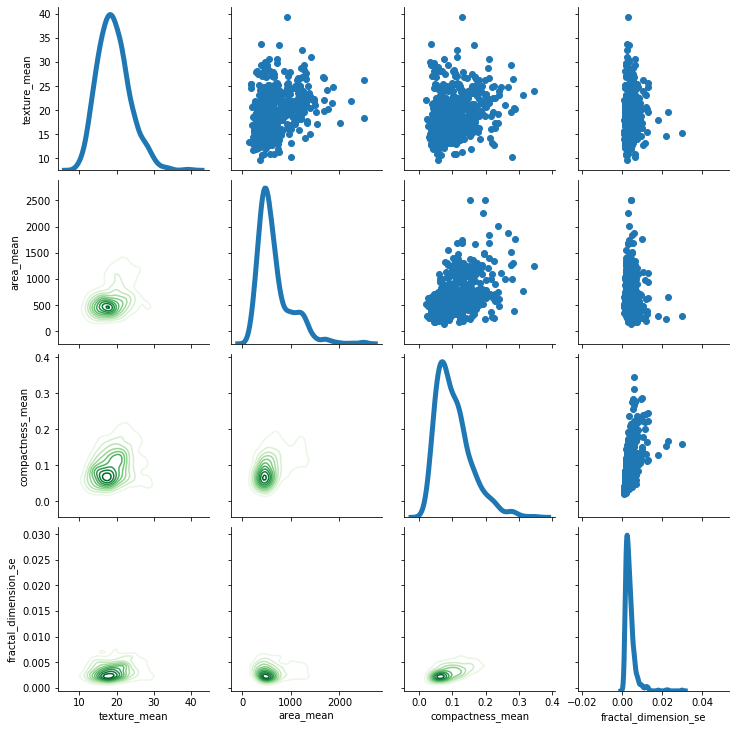

In [15]:
df1 = data.loc[:, ["texture_mean", "area_mean", "compactness_mean", "fractal_dimension_se"]]
g = sns.PairGrid(df1, diag_sharey= False)
g.map_lower(sns.kdeplot, cmap = "Greens")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 5)
plt.show()

##  Correlation
<font color ='pink'>
    Meaning = 1: two variables have positively correlated with each other<br>
    Meaning = 0: has no correlation between them<br>
    Meaning = -0.3: has negative correlation
</font>

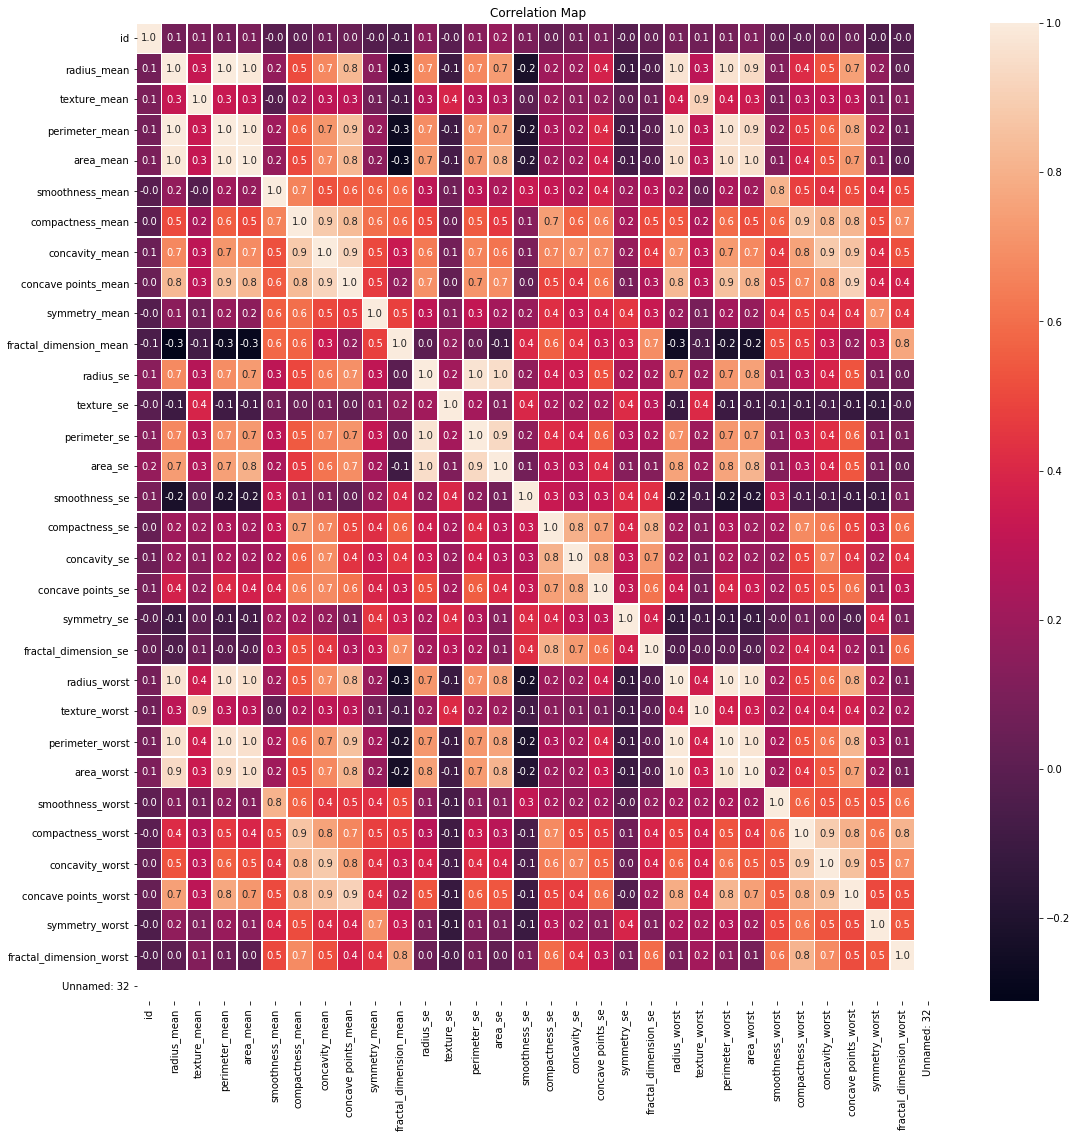

In [16]:
#find how strength of the relationship between two variables
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data.corr(), annot= True, linewidths= 0.5, fmt= ".1f")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("Correlation Map")
plt.savefig("correlation_graph.png") #co the co hoac ko
plt.show()

## Covariance
<font color ='pink'>
    Thước đo hai biến số thay đổi cùng nhau<br>
    Max if two vector are identical (giống hệt nhau)<br>
    Covariance = 0: if two vectors orthogonal (trực giao)<br>
    Covariance < 0: two vectors opposite direction
</font>

In [20]:
#np.cov(data.radius_mean, data.area_mean)
print("Covariance between radius mean und area mean: ", data.radius_mean.cov(data.area_mean))

Covariance between radius mean und area mean:  1224.4834093464565


## Pearson Correlation
<font color ='pink'>
    pearson and pearson1 is the same. In pearson we use corr() method, in pearson1 we apply definition of pearson correlation (cov(A,B)/(std(A)*std(B)))<br>
    person = 1: As we expect pearson correlation between area_mean and area_mean is 1 that means that they are same distribution<br>
    person ~ 1: they are positively correlated with each other and relationship between of the is very high <br>
</font>
<font color ='yellow'>
can be affected by outliers <br>
</font>

In [22]:
# base on corr() Method
pearson = data.loc[:, ["area_mean", "radius_mean"]].corr()
print(pearson)

# base on Form (cov(A,B)/(std(A)*std(B)))
person1 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std() * data.area_mean.std())
print(person1)

             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
0.9873571700566128


## Spearman's Rank Correlation
<font color ='pink'>
    -> works well if the relationship between variables are linear and variables are roughly normal.<br>
    -> it is not robust, if there are outliers <br>
    -> To compute spearman's correlation we need to compute rank of each value <br>
    ------------------------------------------------------------------------------<br>
</font>
<font color ='yellow'>
    -> if relationship between distribution are NON-LINEAR -> better estimate the strength of relationship<br>
</font>

In [23]:
ranked_data =data.rank()
spearman_corr = ranked_data.loc[:, ["area_mean", "radius_mean"]].corr()
print(spearman_corr)

             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


## Hypothesis Testing
<font color ='pink'>
+) We want to answer this question: "given a sample and a apparent effecti what is the probability of seeing such an effect by chance"<br>
+) The first step is to quantify the size of the apparent effect by choosing a test statistic. Natural choice for the test statistic is the difference in means between two groups.<br>
+) The second step is to define null hypothesis that is model of the system based on the assumption that the apparent effect is not real. A null hypothesis is a type of hypothesis used in statistics that proposes that no statistical significance exists in a set of given observations. The null hypothesis is a hypothesis which people tries to disprove it. Alternative hypothesis is a hypothesis which people want to tries to prove it.<br>
+) Third step is compute p-value that is probablity of seeing the apparent effect if the null hypothesis is true. Suppose we have null hypothesis test. Then we calculate p value. If p value is less than or equal to a threshold, we reject null hypothesis.<br>

    ------------------------------------------------------------------------------<br>
</font>
<font color ='yellow'>
+) If the p-value is low, the effect is said to be statistacally significant that means that it is unlikely to have occured by chance. Therefore we can say that the effect is more likely to appear in the larger population.<br>
</font>

In [24]:
statistic, p_value = stats.ttest_rel(data.radius_mean, data.area_mean)
print(p_value)

1.5253492492559045e-184
